In [2]:
import itertools
import pandas as pd
import numpy as np
#import networkx
import scipy.optimize
#import cirq
#import winsound
import time
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 
import pandas as pd 
import scipy.special as sp
from matplotlib import pylab
from pylab import figure, text, scatter, show
from scipy import stats
from pylab import *
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [154]:
Paraswim1dis = 1e3*np.array(np.loadtxt("ParallelSwimmersSide-swim1-1.csv"))
Paraswim2dis = 1e3*np.array(np.loadtxt("ParallelSwimmersSide1-swim2-1.csv"))
Paraswim1dis2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-1.csv"))
Paraswim2dis2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-1.csv"))
Perpswim1dis3 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim1-1.csv"))
Perpswim2dis3 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim2-1.csv"))
distance = np.array(np.loadtxt("DistancesList.csv"))/28.0
Paraswim1phi = 1e3*np.array(np.loadtxt("ParallelSwimmersSide-swim1-phase.csv"))
Paraswim2phi = 1e3*np.array(np.loadtxt("ParallelSwimmersSide1-swim2-phase.csv"))
Paraswim1phi2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-phase2.csv"))
Paraswim2phi2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-phase2.csv"))
Perpswim1phi3 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim1-phase3.csv"))
Perpswim2phi3 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim2-phase3.csv"))
Paraswim1phi_2 = 1e3*np.array(np.loadtxt("ParallelSwimmersSide-swim1-phase-2.csv"))
Paraswim2phi_2 = 1e3*np.array(np.loadtxt("ParallelSwimmersSide1-swim2-phase-2.csv"))
Paraswim1phi2_2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-phase2-2.csv"))
Paraswim2phi2_2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbove-swim1-phase2-2.csv"))
Perpswim1phi3_2 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim1-phase3-2.csv"))
Perpswim2phi3_2 = 1e3*np.array(np.loadtxt("PerpendicularSwimmers-swim2-phase3-2.csv"))
phase = np.array(np.loadtxt("PhaseList2.csv"))

<ipython-input-155-26158396fb94>:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


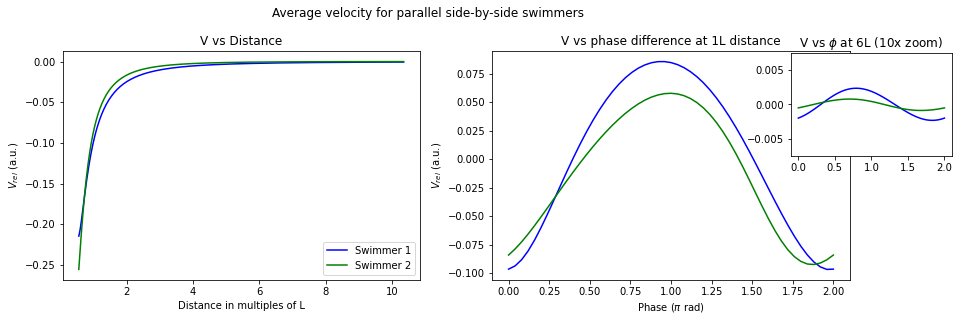

In [155]:
f = plt.figure(figsize=(12,4.5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)


v0 = 0.00109542
Vrel11 = ((Paraswim1dis/1e3) - v0)/v0
Vrel21 = ((Paraswim2dis/1e3) - v0)/v0
Vrel11p = ((Paraswim1phi/1e3) - v0)/v0
Vrel21p = ((Paraswim2phi/1e3) - v0)/v0
Vrel11p2 = ((Paraswim1phi_2/1e3) - v0)/v0
Vrel21p2 = ((Paraswim2phi_2/1e3) - v0)/v0

#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average velocity for parallel side-by-side swimmers")
ax1.plot(distance[:167], Vrel11[:167],color='b', label="Swimmer 1")
ax1.plot(distance[:167], Vrel21[:167], color='g', label="Swimmer 2")
ax1.legend(loc="lower right")
ax1.set_xlabel("Distance in multiples of L")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs Distance')
ax2.plot(phase, Vrel11p, color='b')
ax2.plot(phase, Vrel21p, color='g')
ax2.set_ylabel("$V_{rel}$ (a.u.)")
ax2.set_xlabel("Phase ($\pi$ rad)")
ax2.set_title("V vs phase difference at 1L distance")
#ax1.set_size_inches(15, 15, forward=True)
# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax2, width="75%", height="90%",
                   bbox_to_anchor=(.7, .52, .6, .5),
                   bbox_transform=ax2.transAxes, loc=4)
axins.plot(phase, Vrel11p2, color='b', label="Swimmer 1")
axins.plot(phase, Vrel21p2,  color='g', label="Swimmer 2")
axins.set_ylim([-0.0075, 0.0075])
axins.set_title("V vs $\phi$ at 6L (10x zoom)")
f.tight_layout()
plt.savefig('ParallelSideSwimmers-1.jpg', format='jpg', bbox_inches='tight', dpi=300)

funcion coefficients:
[1.56442910e+08 2.01158830e+08 2.37294573e+08 1.93801406e+08]
Covariance of coefficients:
[[ 3.69174901e+30 -4.69850646e+30  9.53111583e+29 -4.84145193e+29]
 [-4.69850646e+30  2.04451183e+31 -1.85607535e+31  1.69341631e+30]
 [ 9.53111583e+29 -1.85607535e+31  2.68188375e+31 -6.05027707e+30]
 [-4.84145193e+29  1.69341631e+30 -6.05027707e+30  7.28728530e+30]]
-0.31312455326541744


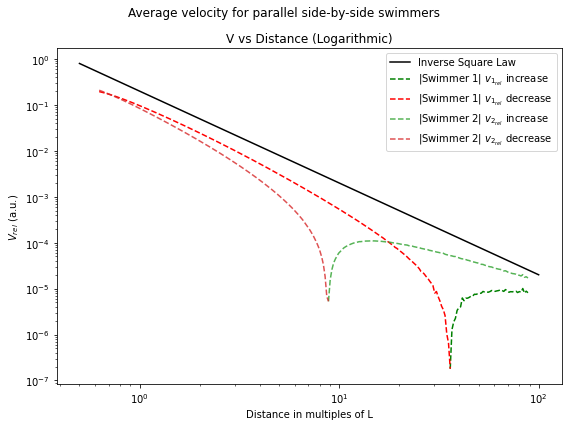

In [93]:
v0 = 0.00109542
Vrel = (((Paraswim1dis[10:275]/1e3) - v0)/v0)
Vrel_2 = (((Paraswim2dis[10:275]/1e3) - v0)/v0)
r = np.linspace(0.5, 100, 1000)
X = 1/r**2

dtrunc = distance[10:275]


def xn(dtrunc, a, b, c, d): 
    return 1/(a+b*dtrunc+c*dtrunc**2+d*dtrunc**3)
  
# curve_fit() function takes the test-function 
# x-data and y-data as argument and returns  
# the coefficients a and b in param and 
# the estimated covariance of param in param_cov 
param, param_cov = curve_fit(xn, dtrunc, Vrel) 
  
print("funcion coefficients:")
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 

residuals = Vrel-xn(dtrunc, param[0], param[1], param[2], param[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Vrel-np.mean(Vrel))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)


  
# ans stores the new y-data according to  
# the coefficients given by curve-fit() function 
xn_ans = 1/(param[0]+param[1]*dtrunc+param[2]*dtrunc**2+param[3]*dtrunc**3)


f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)


#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average velocity for parallel side-by-side swimmers")
#ax1.loglog(dtrunc, Vrel,color='b', label="|Swimmer 1|")
ax1.loglog(r, X*2e-1, color='k', label="Inverse Square Law")
#ax1.loglog(dtrunc, xn_ans, '--', color ='r', label ="$1/(3.7-4.9x+11.1x^2+0.36x^3)$") 
#ax1.loglog(dtrunc, Vrel, color='b', label="Swimmer 1")
ax1.loglog(dtrunc[219:], np.abs(Vrel[219:]), ls='--', color='g', label="|Swimmer 1| $v_{1_{rel}}$ increase")
ax1.loglog(dtrunc[:220], np.abs(Vrel[:220]), ls='--', color='r', label="|Swimmer 1| $v_{1_{rel}}$ decrease")
#ax1.loglog(dtrunc, np.abs(Vrel_2), ls='--', label="|Swimmer 2|")
ax1.loglog(dtrunc[148:], np.abs(Vrel_2[148:]), ls='--', color='tab:green', alpha=0.8, label="|Swimmer 2| $v_{2_{rel}}$ increase")
ax1.loglog(dtrunc[:149], np.abs(Vrel_2[:149]), ls='--', color='tab:red', alpha=0.8, label="|Swimmer 2| $v_{2_{rel}}$ decrease")
ax1.legend(loc="upper right")
ax1.set_xlabel("Distance in multiples of L")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs Distance (Logarithmic)')
#ax1.axvline(x=36, ymax=0.3, color='m')
#ax1.fill_between(x=dtrunc[219:], y1=np.abs(Vrel[219:]), alpha=0.1, color='g', label='Vrel increase')
#ax1.fill_between(x=dtrunc[:219], y1=np.abs(Vrel[:219]), alpha=0.1, color='r', label='Vrel decrease')
#ax1.text(2, 5e-6, '$V_{rel}$ decrease', fontsize=12, color='r')
#ax1.text(39, 5e-7, '$V_{rel}$ increase', fontsize=12, color='g')
#ax1.set_size_inches(15, 15, forward=True)
f.tight_layout()
#plt.savefig('ParallelSideSwimmersLog-1.jpg', format='jpg', bbox_inches='tight', dpi=300)

In [88]:
np.where(Vrel_2>0)

(array([148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
        161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
        187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199,
        200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
        213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
        226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
        239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
        252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264]),)

<ipython-input-137-bd3bd48392c7>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


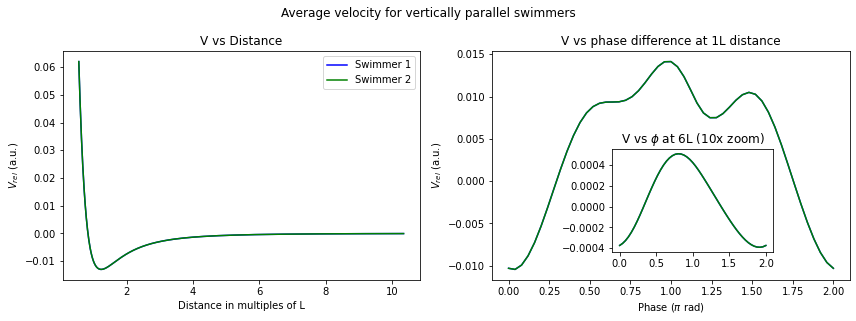

In [137]:
f = plt.figure(figsize=(12,4.5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

v0 = 0.00109542
Vrel12 = ((Paraswim1dis2/1e3) - v0)/v0
Vrel22 = ((Paraswim2dis2/1e3) - v0)/v0
Vrel12p = ((Paraswim1phi2/1e3) - v0)/v0
Vrel22p = ((Paraswim2phi2/1e3) - v0)/v0
Vrel12p2 = ((Paraswim1phi2_2/1e3) - v0)/v0
Vrel22p2 = ((Paraswim2phi2_2/1e3) - v0)/v0

#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average velocity for vertically parallel swimmers")
ax1.plot(distance[:167], Vrel12[:167],color='b', label="Swimmer 1")
ax1.plot(distance[:167], Vrel22[:167], color='g', label="Swimmer 2")
ax1.legend(loc="upper right")
ax1.set_xlabel("Distance in multiples of L")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs Distance')
ax2.plot(phase, Vrel12p, color='b')
ax2.plot(phase, Vrel22p, color='g')
ax2.set_ylabel("$V_{rel}$ (a.u.)")
ax2.set_xlabel("Phase ($\pi$ rad)")
ax2.set_title("V vs phase difference at 1L distance")
#ax1.set_size_inches(15, 15, forward=True)
# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax2, width="75%", height="90%",
                   bbox_to_anchor=(.2, .1, .6, .5),
                   bbox_transform=ax2.transAxes, loc=4)
axins.plot(phase, Vrel12p2,color='b', label="Swimmer 1" )
axins.plot(phase, Vrel22p2, color='g', label="Swimmer 2")
axins.set_title("V vs $\phi$ at 6L (10x zoom)")
f.tight_layout()
plt.savefig('ParallelTopSwimmers-1.jpg', format='jpg', bbox_inches='tight', dpi=300)

funcion coefficients:
[ -43473.58158424  196711.76852064 -296681.05480417  149280.55500601]
Covariance of coefficients:
[[ 8.73646492e+08 -3.91299726e+09  5.83411112e+09 -2.89551231e+09]
 [-3.91299726e+09  1.75315033e+10 -2.61471129e+10  1.29812779e+10]
 [ 5.83411112e+09 -2.61471129e+10  3.90096104e+10 -1.93736928e+10]
 [-2.89551231e+09  1.29812779e+10 -1.93736928e+10  9.62508037e+09]]
0.4814888037105982


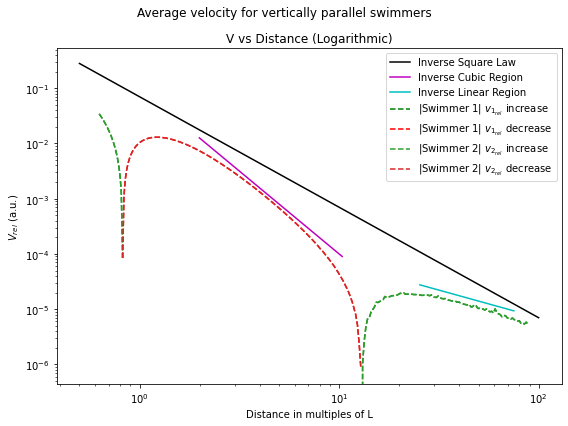

In [153]:
Vrel2 = np.array((((Paraswim1dis2[10:275]/1e3) - v0)/v0))
Vrel2_2 = np.array((((Paraswim2dis2[10:275]/1e3) - v0)/v0))
r = np.linspace(0.5, 100, 1000)
X = 1/r**2
Y = 1/r
Z = 1/r**3
dtrunc = np.array(distance[10:275])

def xn(dtrunc, a, b, c, d): 
    return 1/(a+b*dtrunc+c*dtrunc**2+d*dtrunc**3)
  
# curve_fit() function takes the test-function 
# x-data and y-data as argument and returns  
# the coefficients a and b in param and 
# the estimated covariance of param in param_cov 
param, param_cov = curve_fit(xn, dtrunc, Vrel2) 
  
print("funcion coefficients:")
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 

residuals = Vrel2-xn(dtrunc, param[0], param[1], param[2], param[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Vrel2-np.mean(Vrel2))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)


  
# ans stores the new y-data according to  
# the coefficients given by curve-fit() function 
xn_ans = 1/(param[0]+param[1]*dtrunc+param[2]*dtrunc**2+param[3]*dtrunc**3)


f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)


#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average velocity for vertically parallel swimmers")
#ax1.loglog(dtrunc, Vrel2, color='b', label="Swimmer 1")
#ax1.loglog(dtrunc, np.abs(Vrel2), ls='--', label="|Swimmer 1|")
ax1.loglog(r, X*7e-2, color='k', label="Inverse Square Law")
ax1.loglog(r[15:100], Z[15:100]*1e-1, color='m', label='Inverse Cubic Region')
ax1.loglog(r[250:750], Y[250:750]*7e-4, color='c', label='Inverse Linear Region')
#ax1.loglog(dtrunc, xn_ans, '--', color ='r', label ="Inverse polynomial model") 
ax1.set_xlabel("Distance in multiples of L")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs Distance (Logarithmic)')
#ax1.fill_between(x=dtrunc[168:], y1=np.abs(Vrel2[168:]), alpha=0.1, color='g', label='$V_{rel}$ increase')
#ax1.fill_between(x=dtrunc[:19], y1=np.abs(Vrel2[:19]), alpha=0.1, color='g', label='Vrel increase')
#ax1.fill_between(x=dtrunc[19:168], y1=np.abs(Vrel2[19:168]), alpha=0.1, color='r', label='Vrel decrease')
#ax1.text(2, 5e-6, '$V_{rel}$ decrease', fontsize=12, color='r')
#ax1.text(0.65, 5e-6, '$V_{rel}$ increase', fontsize=12, color='g', rotation=90)
#ax1.text(25, 2e-6, '$V_{rel}$ increase', fontsize=12, color='g')
ax1.loglog(dtrunc[:19], Vrel2[:19], ls='--', color='g', label="|Swimmer 1| $v_{1_{rel}}$ increase")
ax1.loglog(dtrunc[167:], Vrel2[167:], ls='--', color='g')
ax1.loglog(dtrunc[18:168], np.abs(Vrel2[18:168]), ls='--', color='r', label="|Swimmer 1| $v_{1_{rel}}$ decrease")
ax1.loglog(dtrunc[:19], Vrel2_2[:19], ls='--', color='tab:green', label="|Swimmer 2| $v_{2_{rel}}$ increase")
ax1.loglog(dtrunc[167:], Vrel2_2[167:], ls='--', color='tab:green')
ax1.loglog(dtrunc[18:168], np.abs(Vrel2_2[18:168]), ls='--', color='tab:red', label="|Swimmer 2| $v_{2_{rel}}$ decrease")
#ax1.loglog(dtrunc, np.abs(Vrel_2), ls='--', label="|Swimmer 2|")
#ax1.loglog(dtrunc[np.r_[:19, 168:]], np.abs(Vrel2_2[np.r_[:19, 168:]]), ls='--', color='tab:green', alpha=0.8, label="|Swimmer 2| $v_{2_{rel}}$ increase")
#ax1.loglog(dtrunc[19:168], np.abs(Vrel2_2[19:168]), ls='--', color='tab:red', alpha=0.8, label="|Swimmer 2| $v_{2_{rel}}$ decrease")
#ax1.set_size_inches(15, 15, forward=True)
ax1.legend(loc="upper right")
f.tight_layout()
#plt.savefig('ParallelTopSwimmersLog-1.jpg', format='jpg', bbox_inches='tight', dpi=300)

In [130]:
np.concatenate((dtrunc[:19],dtrunc[168:]))

array([ 0.62790039,  0.63697744,  0.64623786,  0.65568534,  0.66532368,
        0.67515673,  0.68518842,  0.69542276,  0.70586385,  0.71651587,
        0.72738306,  0.7384698 ,  0.74978049,  0.76131968,  0.77309198,
        0.78510209,  0.79735482,  0.80985507,  0.82260785, 13.11438874,
       13.37570959, 13.64230946, 13.91429501, 14.19177504, 14.47486053,
       14.76366472, 15.05830315, 15.35889367, 15.66555652, 15.97841438,
       16.29759238, 16.6232182 , 16.9554221 , 17.29433697, 17.64009837,
       17.99284461, 18.3527168 , 18.71985889, 19.09441774, 19.47654318,
       19.86638807, 20.26410835, 20.66986311, 21.08381466, 21.50612859,
       21.93697382, 22.37652271, 22.82495107, 23.28243829, 23.74916736,
       24.22532498, 24.71110163, 25.20669161, 25.71229318, 26.22810857,
       26.75434413, 27.29121035, 27.83892199, 28.39769813, 28.96776231,
       29.54934254, 30.14267148, 30.74798645, 31.3655296 , 31.99554794,
       32.6382935 , 33.29402339, 33.96299989, 34.64549062, 35.34

In [97]:
np.where(Vrel2_2>0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
        201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
        214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
        227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
        240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
        253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264]),)

In [139]:
r = np.linspace(0.1, 10, 1000)
X = 1/r**2

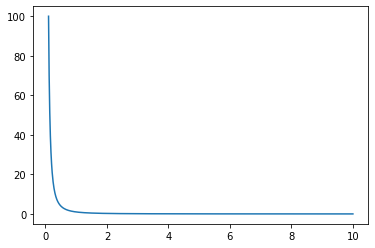

In [140]:
plt.plot(r, X)

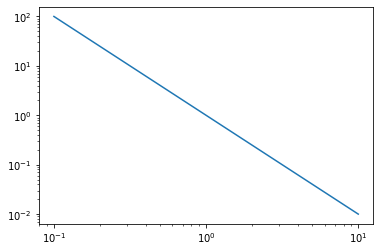

In [141]:
plt.loglog(r,X)

<ipython-input-142-eade7a55cbfd>:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


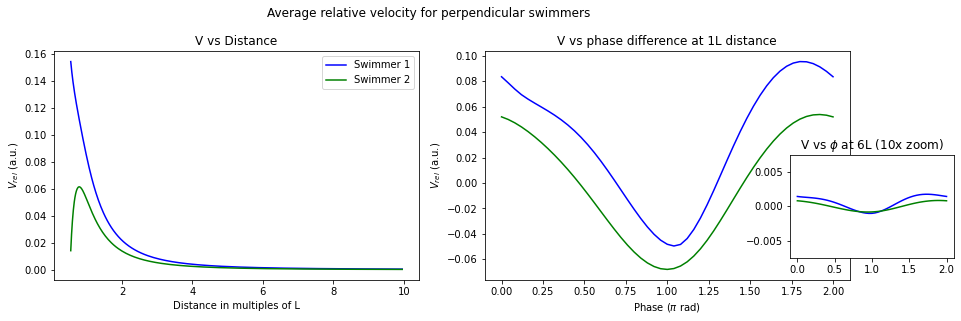

In [142]:
f = plt.figure(figsize=(12,4.5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

v0 = 0.00109542
Vrel13 = ((Perpswim1dis3/1e3) - v0)/v0
Vrel23 = ((Perpswim2dis3/1e3) - v0)/v0
Vrel13p = ((Perpswim1phi3/1e3) - v0)/v0
Vrel23p = ((Perpswim2phi3/1e3) - v0)/v0
Vrel13p2 = ((Perpswim1phi3_2/1e3) - v0)/v0
Vrel23p2 = ((Perpswim2phi3_2/1e3) - v0)/v0

#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average relative velocity for perpendicular swimmers")
ax1.plot(distance[:165], Vrel13[:165],color='b', label="Swimmer 1")
ax1.plot(distance[:165], Vrel23[:165], color='g', label="Swimmer 2")
ax1.set_xlabel("Distance in multiples of L")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs Distance')
ax1.legend(loc="upper right")
ax2.plot(phase, Vrel13p, color='b')
ax2.plot(phase, Vrel23p, color='g')
ax2.set_ylabel("$V_{rel}$ (a.u.)")
ax2.set_xlabel("Phase ($\pi$ rad)")
ax2.set_title("V vs phase difference at 1L distance")
#ax1.set_size_inches(15, 15, forward=True)
# Create inset of width 1.3 inches and height 0.9 inches
# at the default upper right location
axins = inset_axes(ax2, width="75%", height="90%",
                   bbox_to_anchor=(.7, .075, .6, .5),
                   bbox_transform=ax2.transAxes, loc=4)
axins.plot(phase, Vrel13p2, color='b', label="Swimmer 1")
axins.plot(phase, Vrel23p2, color='g', label="Swimmer 2")
axins.set_title("V vs $\phi$ at 6L (10x zoom)")
axins.set_ylim([-0.0075, 0.0075])
f.tight_layout()
plt.savefig('PerpendicularSwimmers-1.jpg', format='jpg', bbox_inches='tight', dpi=300)

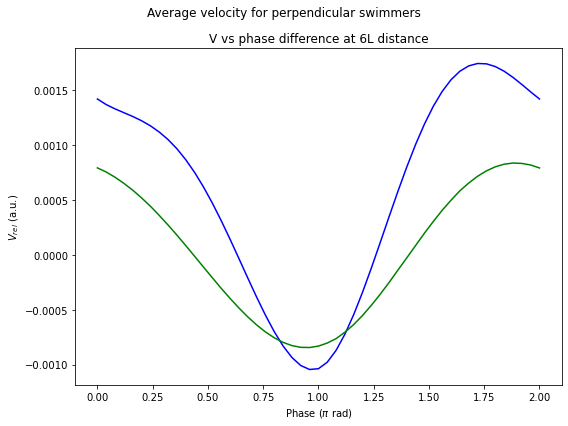

In [143]:
Vrel13p2 = ((Perpswim1phi3_2/1e3) - v0)/v0
Vrel23p2 = ((Perpswim2phi3_2/1e3) - v0)/v0


f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)


#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average velocity for perpendicular swimmers")
ax1.plot(phase, Vrel13p2, color='b')
ax1.plot(phase, Vrel23p2, color='g')
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_xlabel("Phase ($\pi$ rad)")
ax1.set_title("V vs phase difference at 6L distance")
#ax1.set_size_inches(15, 15, forward=True)
f.tight_layout()

funcion coefficients:
[ 6.40331686 -3.61581418  6.80676973  2.42834082]
Covariance of coefficients:
[[ 0.00571274 -0.0160932   0.01385132 -0.00356333]
 [-0.0160932   0.04608521 -0.04044633  0.01064443]
 [ 0.01385132 -0.04044633  0.03639105 -0.00988017]
 [-0.00356333  0.01064443 -0.00988017  0.00280302]]
0.9999832005509425


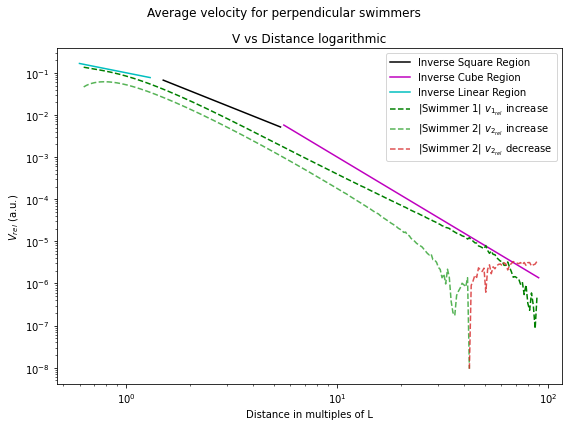

In [152]:
Vrel3 = np.array((Perpswim1dis3[10:275]/1e3) - v0)/v0
Vrel3_2 = np.array((Perpswim2dis3[10:275]/1e3) - v0)/v0
r = np.linspace(0.5, 100, 1000)
X = 1/r**2
Y = 1/r**3
Z = 1/r
dtrunc = np.array(distance[10:275])



def xn(dtrunc, a, b, c, d): 
    return 1/(a+b*dtrunc+c*dtrunc**2+d*dtrunc**3)
  
# curve_fit() function takes the test-function 
# x-data and y-data as argument and returns  
# the coefficients a and b in param and 
# the estimated covariance of param in param_cov 
param, param_cov = curve_fit(xn, dtrunc, Vrel3) 
  
print("funcion coefficients:")
print(param) 
print("Covariance of coefficients:") 
print(param_cov) 

residuals = Vrel3-xn(dtrunc, param[0], param[1], param[2], param[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((Vrel3-np.mean(Vrel3))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)


  
# ans stores the new y-data according to  
# the coefficients given by curve-fit() function 
xn_ans = 1/(param[0]+param[1]*dtrunc+param[2]*dtrunc**2+param[3]*dtrunc**3)




f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)


#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average velocity for perpendicular swimmers")
ax1.loglog(r[10:50], X[10:50]*1.5e-1, color='k', label="Inverse Square Region")
ax1.loglog(r[51:900], Y[51:900], color='m', label="Inverse Cube Region")
ax1.loglog(r[1:9], Z[1:9]*1e-1, color='c', label='Inverse Linear Region')
#ax1.loglog(dtrunc, xn_ans, '--', color ='r', label ="$1/(6.4-3.6x+6.8x^2+2.42x^3)$") 
ax1.loglog(dtrunc, np.abs(Vrel3), color='g', ls='--', label="|Swimmer 1| $v_{1_{rel}}$ increase")
ax1.loglog(dtrunc[:228], np.abs(Vrel3_2[:228]), ls='--', color='tab:green', alpha=0.8, label="|Swimmer 2| $v_{2_{rel}}$ increase")
#ax1.loglog(dtrunc[218:], Vrel3_2[218:], ls='--', color='tab:green')
ax1.loglog(dtrunc[227:], np.abs(Vrel3_2[227:]), ls='--', color='tab:red', alpha=0.8, label="|Swimmer 2| $v_{2_{rel}}$ decrease")
ax1.legend(loc="upper right")
ax1.set_xlabel("Distance in multiples of L")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs Distance logarithmic')
#ax1.fill_between(x=dtrunc, y1=np.abs(Vrel3), alpha=0.1, color='g', label='Vrel increase')
#ax1.text(3, 5e-6, '$V_{rel}$ increase', fontsize=12, color='g')
#ax1.set_size_inches(15, 15, forward=True)
f.tight_layout()
#plt.savefig('PerpendicularSwimmersLog-1.jpg', format='jpg', bbox_inches='tight', dpi=300)

In [145]:
np.where(Vrel3_2>0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

### The equations/model used breaks down at distances much less than L (could be "crashing" into each other)
Assuming that certain parameters are "real" and limited by the boltzmann simulation grid, so r is capped at 1 grid length, rho is kept to a physical bound of 12, and frequency was kept within a few orders of magnitude. 

In [80]:
synergy - parallel above - 0.9pi 
antagonism - perpendicular - 0.1pi



SyntaxError: invalid syntax (<ipython-input-80-1d07c03f7be7>, line 1)

In [157]:
Paraswim1radius = 1e3*np.array(np.loadtxt("ParallelSwimmersAboveRadius-swim1-1.csv"))
Paraswim2radius = 1e3*np.array(np.loadtxt("ParallelSwimmersAboveRadius-swim2-1.csv"))
radius = np.array(np.loadtxt("RadiusList.csv"))
Paraswim1mass = 1e3*np.array(np.loadtxt("ParallelSwimmersAboveMass-swim1-1.csv"))
Paraswim2mass = 1e3*np.array(np.loadtxt("ParallelSwimmersAboveMass-swim2-1.csv"))
mass = np.array(np.loadtxt("DensityList.csv"))*(4/3*np.pi)
Paraswim1freq = 1e3*np.array(np.loadtxt("ParallelSwimmersAbovefreq-swim1-1.csv"))
Paraswim2freq = 1e3*np.array(np.loadtxt("ParallelSwimmersAbovefreq-swim2-1.csv"))
freq = np.array(np.loadtxt("FreqList.csv"))

<ipython-input-172-a202ab01ce17>:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


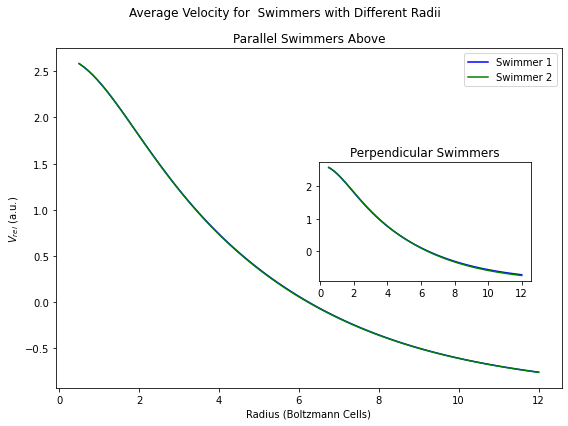

In [172]:
f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot()


v0 = 0.00109542
Vrel11 = ((Paraswim1radius/1e3) - v0)/v0
Vrel21 = ((Paraswim2radius/1e3) - v0)/v0

v0 = 0.00109542
Vrel112 = ((Paraswim1radius2/1e3) - v0)/v0
Vrel212 = ((Paraswim2radius2/1e3) - v0)/v0


#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average Velocity for  Swimmers with Different Radii")
ax1.plot(radius, Vrel11,color='b', label="Swimmer 1")
ax1.plot(radius, Vrel21, color='g', label="Swimmer 2")
ax1.legend(loc="upper right")
ax1.set_xlabel("Radius (Boltzmann Cells)")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('Parallel Swimmers Above')



axins = inset_axes(ax1, width="70%", height="70%",
                   bbox_to_anchor=(.35, .3, .6, .5),
                   bbox_transform=ax1.transAxes, loc=4)

axins.plot(radius, Vrel112,color='b', label="Swimmer 1")
axins.plot(radius, Vrel212, color='g', label="Swimmer 2")
axins.set_title('Perpendicular Swimmers')
#axins.set_ylim([-0.0075, 0.0075])



#ax1.set_size_inches(15, 15, forward=True)
f.tight_layout()
plt.savefig('RadiusSweepinset-1.jpg', format='jpg', bbox_inches='tight', dpi=300)

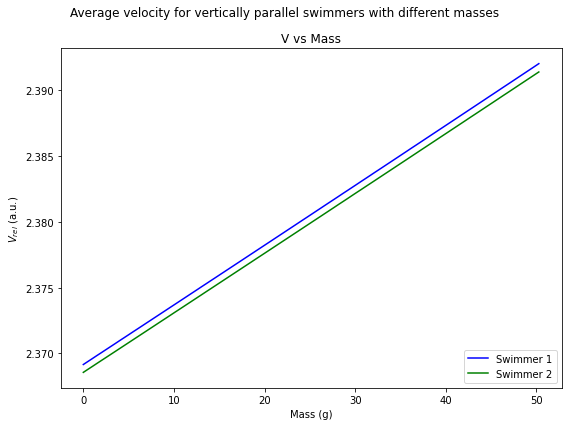

In [147]:
f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)


v0 = 0.00109542
Vrel12 = ((Paraswim1mass/1e3) - v0)/v0
Vrel22 = ((Paraswim2mass/1e3) - v0)/v0


#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average velocity for vertically parallel swimmers with different masses")
ax1.plot(mass, Vrel12,color='b', label="Swimmer 1")
ax1.plot(mass, Vrel22, color='g', label="Swimmer 2")
ax1.legend(loc="lower right")
ax1.set_xlabel("Mass (g)")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs Mass')
#ax1.set_size_inches(15, 15, forward=True)
f.tight_layout()

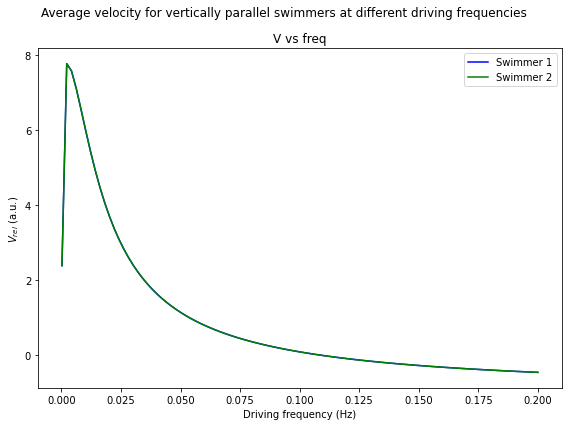

In [148]:
f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)


v0 = 0.00109542
Vrel13 = ((Paraswim1freq/1e3) - v0)/v0
Vrel23 = ((Paraswim2freq/1e3) - v0)/v0


#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average velocity for vertically parallel swimmers at different driving frequencies")
ax1.plot(freq, Vrel13,color='b', label="Swimmer 1")
ax1.plot(freq, Vrel23, color='g', label="Swimmer 2")
ax1.legend(loc="upper right")
ax1.set_xlabel("Driving frequency (Hz)")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs freq')
#ax1.set_size_inches(15, 15, forward=True)
f.tight_layout()

Linear relationship with v and mass... at least in the small radius regime. 

In [149]:
Vrel13[0:10]

array([2.38816189, 7.75982975, 7.56549743, 7.0997067 , 6.54436143,
       5.97263042, 5.42423573, 4.91829033, 4.46140173, 4.05337455])

In [150]:
freq[1]

0.002198

In [151]:
f = 0.002198

In [159]:
Paraswim1radius2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAboveRadius-swim1-2.csv"))
Paraswim2radius2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAboveRadius-swim2-2.csv"))
radius = np.array(np.loadtxt("RadiusList.csv"))
Paraswim1mass2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAboveMass-swim1-2.csv"))
Paraswim2mass2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAboveMass-swim2-2.csv"))
mass = np.array(np.loadtxt("DensityList.csv"))*(4/3*np.pi)
Paraswim1freq2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbovefreq-swim1-2.csv"))
Paraswim2freq2 = 1e3*np.array(np.loadtxt("ParallelSwimmersAbovefreq-swim2-2.csv"))
freq = np.array(np.loadtxt("FreqList.csv"))

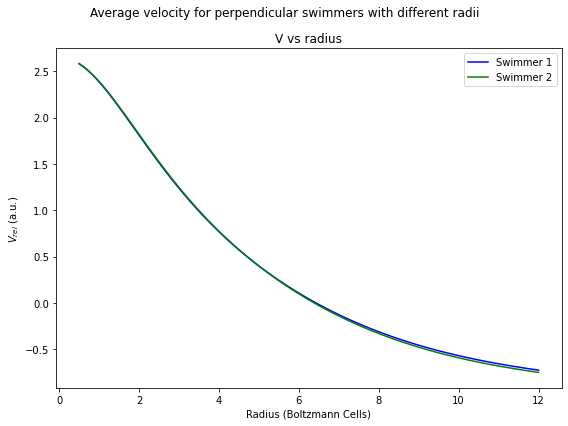

In [153]:
f = plt.figure(figsize=(8,6))
ax1 = f.add_subplot(111)


v0 = 0.00109542
Vrel112 = ((Paraswim1radius2/1e3) - v0)/v0
Vrel212 = ((Paraswim2radius2/1e3) - v0)/v0


#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average velocity for perpendicular swimmers with different radii")
ax1.plot(radius, Vrel112,color='b', label="Swimmer 1")
ax1.plot(radius, Vrel212, color='g', label="Swimmer 2")
ax1.legend(loc="upper right")
ax1.set_xlabel("Radius (Boltzmann Cells)")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('V vs radius')
#ax1.set_size_inches(15, 15, forward=True)
f.tight_layout()

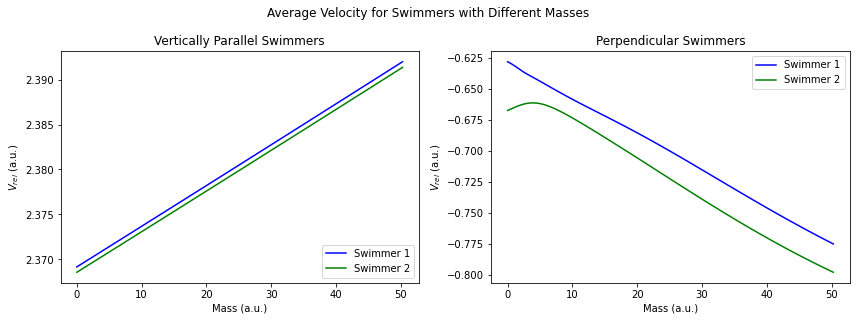

In [160]:
f = plt.figure(figsize=(12,4.5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)


v0 = 0.00109542
Vrel122 = ((Paraswim1mass2/1e3) - v0)/v0
Vrel222 = ((Paraswim2mass2/1e3) - v0)/v0


v0 = 0.00109542
Vrel12 = ((Paraswim1mass/1e3) - v0)/v0
Vrel22 = ((Paraswim2mass/1e3) - v0)/v0


#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average Velocity for Swimmers with Different Masses")
ax1.plot(mass, Vrel12,color='b', label="Swimmer 1")
ax1.plot(mass, Vrel22, color='g', label="Swimmer 2")
ax1.legend(loc="lower right")
ax1.set_xlabel("Mass (a.u.)")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('Vertically Parallel Swimmers')
#ax1.set_size_inches(15, 15, forward=True)





#norm.pdf(datax), norm.pdf(datay)
#f.suptitle("Average velocity for perpendicular swimmers with different masses")
ax2.plot(mass, Vrel122,color='b', label="Swimmer 1")
ax2.plot(mass, Vrel222, color='g', label="Swimmer 2")
ax2.legend(loc="upper right")
ax2.set_xlabel("Mass (a.u.)")
ax2.set_ylabel("$V_{rel}$ (a.u.)")
ax2.set_title('Perpendicular Swimmers')
#ax1.set_size_inches(15, 15, forward=True)
f.tight_layout()
plt.savefig('MassSweepsubplots-1.jpg', format='jpg', bbox_inches='tight', dpi=300)

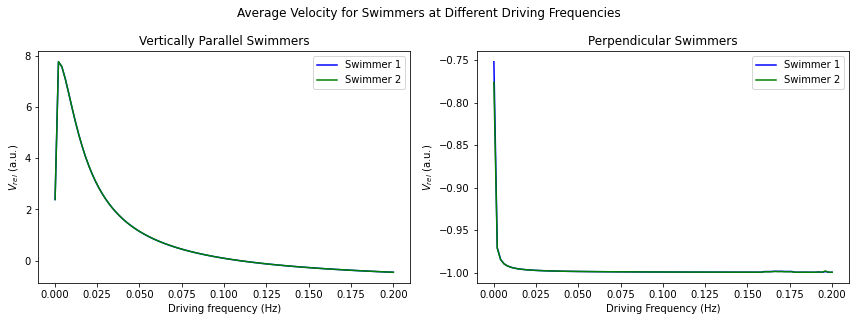

In [155]:
f = plt.figure(figsize=(12,4.5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)


v0 = 0.00109542
Vrel132 = ((Paraswim1freq2/1e3) - v0)/v0
Vrel232 = ((Paraswim2freq2/1e3) - v0)/v0


#norm.pdf(datax), norm.pdf(datay)
f.suptitle("Average Velocity for Swimmers at Different Driving Frequencies")
ax2.plot(freq, Vrel132,color='b', label="Swimmer 1")
ax2.plot(freq, Vrel232, color='g', label="Swimmer 2")
ax2.legend(loc="upper right")
ax2.set_xlabel("Driving Frequency (Hz)")
ax2.set_ylabel("$V_{rel}$ (a.u.)")
ax2.set_title('Perpendicular Swimmers')
#ax1.set_size_inches(15, 15, forward=True)

v0 = 0.00109542
Vrel13 = ((Paraswim1freq/1e3) - v0)/v0
Vrel23 = ((Paraswim2freq/1e3) - v0)/v0


#norm.pdf(datax), norm.pdf(datay)
ax1.plot(freq, Vrel13,color='b', label="Swimmer 1")
ax1.plot(freq, Vrel23, color='g', label="Swimmer 2")
ax1.legend(loc="upper right")
ax1.set_xlabel("Driving frequency (Hz)")
ax1.set_ylabel("$V_{rel}$ (a.u.)")
ax1.set_title('Vertically Parallel Swimmers')
#ax1.set_size_inches(15, 15, forward=True)
f.tight_layout()
plt.savefig('FreqSweepsubplot-1.jpg', format='jpg', bbox_inches='tight', dpi=300)

In [156]:
max(Paraswim1freq2)

0.2720477053795489

In [157]:
v1syn = 0.00959569 
v2syn = 0.00959467
v1ant = 3.5053e-6 
v2ant = 3.49591e-6
v0 = 0.00109542
v1synrel = ((v1syn) - v0)/v0
v2synrel = ((v2syn) - v0)/v0
v1antrel = ((v1ant) - v0)/v0
v2antrel = ((v2ant) - v0)/v0
A = np.array([v1synrel, v2synrel, v1antrel, v2antrel])
A

array([ 7.75982728,  7.75889613, -0.99680004, -0.99680861])

### Swimmer speed is extremely dependent on the parameters of the setup and swimmer configuration
#### Mass dependence is opposite for parallel and perpendicular arrangements
An order of magnitude and direction difference between optimal synergystic params and competing setups, speeding up by ~10 times and slowing down by -1 times. 

Lots of possible speculation on parameter effects and why

 collect all figures for paper, start collecting literature.